Telecom_customer_churn

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings(action="ignore")

In [53]:
df=pd.read_csv("Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
df.shape

(7043, 21)

In [55]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [56]:
df.drop(['customerID'],axis=1,inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [58]:
df.duplicated().sum()

22

In [59]:
df.drop_duplicates(keep='last',inplace=True)

In [60]:
df.duplicated().sum()

0

In [61]:
df.shape

(7021, 20)

In [62]:
df['TotalCharges'].unique

<bound method Series.unique of 0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7021, dtype: object>

In [63]:
df['TotalCharges'].isin([' ']).sum().any()

True

In [64]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

In [65]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [66]:
df['TotalCharges'].unique

<bound method Series.unique of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7021, dtype: float64>

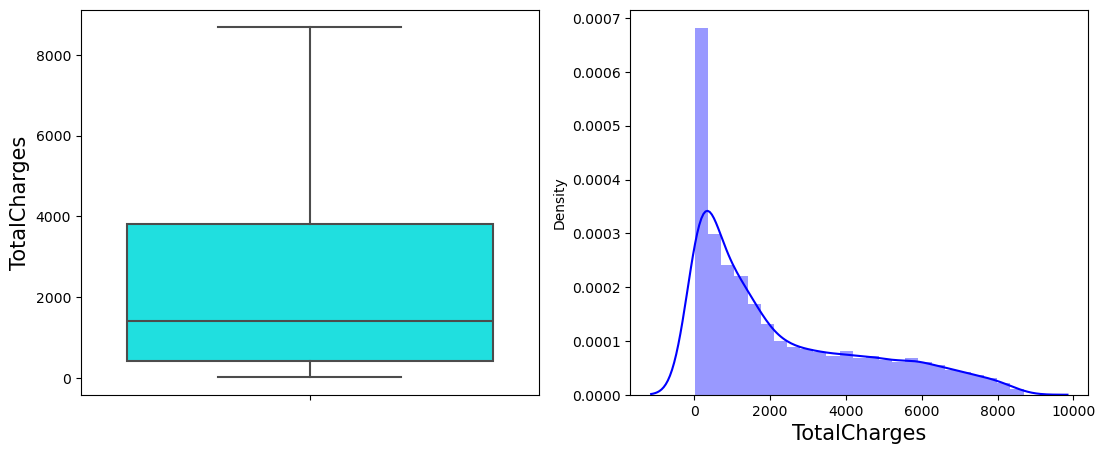

In [67]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges',data=df,color='cyan')
plt.ylabel('TotalCharges',fontsize=15)

plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'],color='b')
plt.xlabel('TotalCharges',fontsize=15)
plt.show()

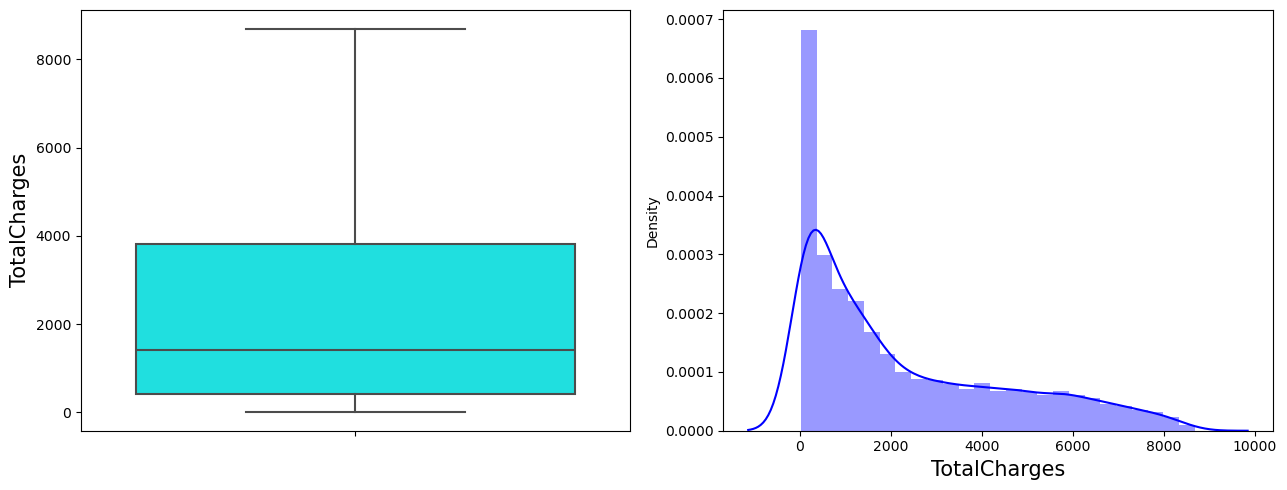

In [68]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges',data=df,color='cyan')
plt.ylabel('TotalCharges',fontsize=15)

plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'],color='b')
plt.xlabel('TotalCharges',fontsize=15)
plt.tight_layout()
plt.show()

In [69]:
print('Mean of TotalCharges:',df['TotalCharges'].mean())
print('Median of TotalCharges:',df['TotalCharges'].median())

Mean of TotalCharges: 2290.3533880171185
Median of TotalCharges: 1403.875


In [70]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [71]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2290.353388
std,0.368947,24.534965,30.069001,2265.044136
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,411.150000
50%,0.000000,29.000000,70.400000,1410.250000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


In [75]:
Numerical=df.select_dtypes(exclude='object')
categorical=df.select_dtypes(include='object')

In [76]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print("="*100)

gender
gender
Male      3541
Female    3480
Name: count, dtype: int64
Partner
Partner
No     3619
Yes    3402
Name: count, dtype: int64
Dependents
Dependents
No     4911
Yes    2110
Name: count, dtype: int64
PhoneService
PhoneService
Yes    6339
No      682
Name: count, dtype: int64
MultipleLines
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64
OnlineSecurity
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype: int64
OnlineBackup
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: count, dtype: int64
DeviceProtection
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: count, dtype: int64
TechSupport
TechSupport
No                     34

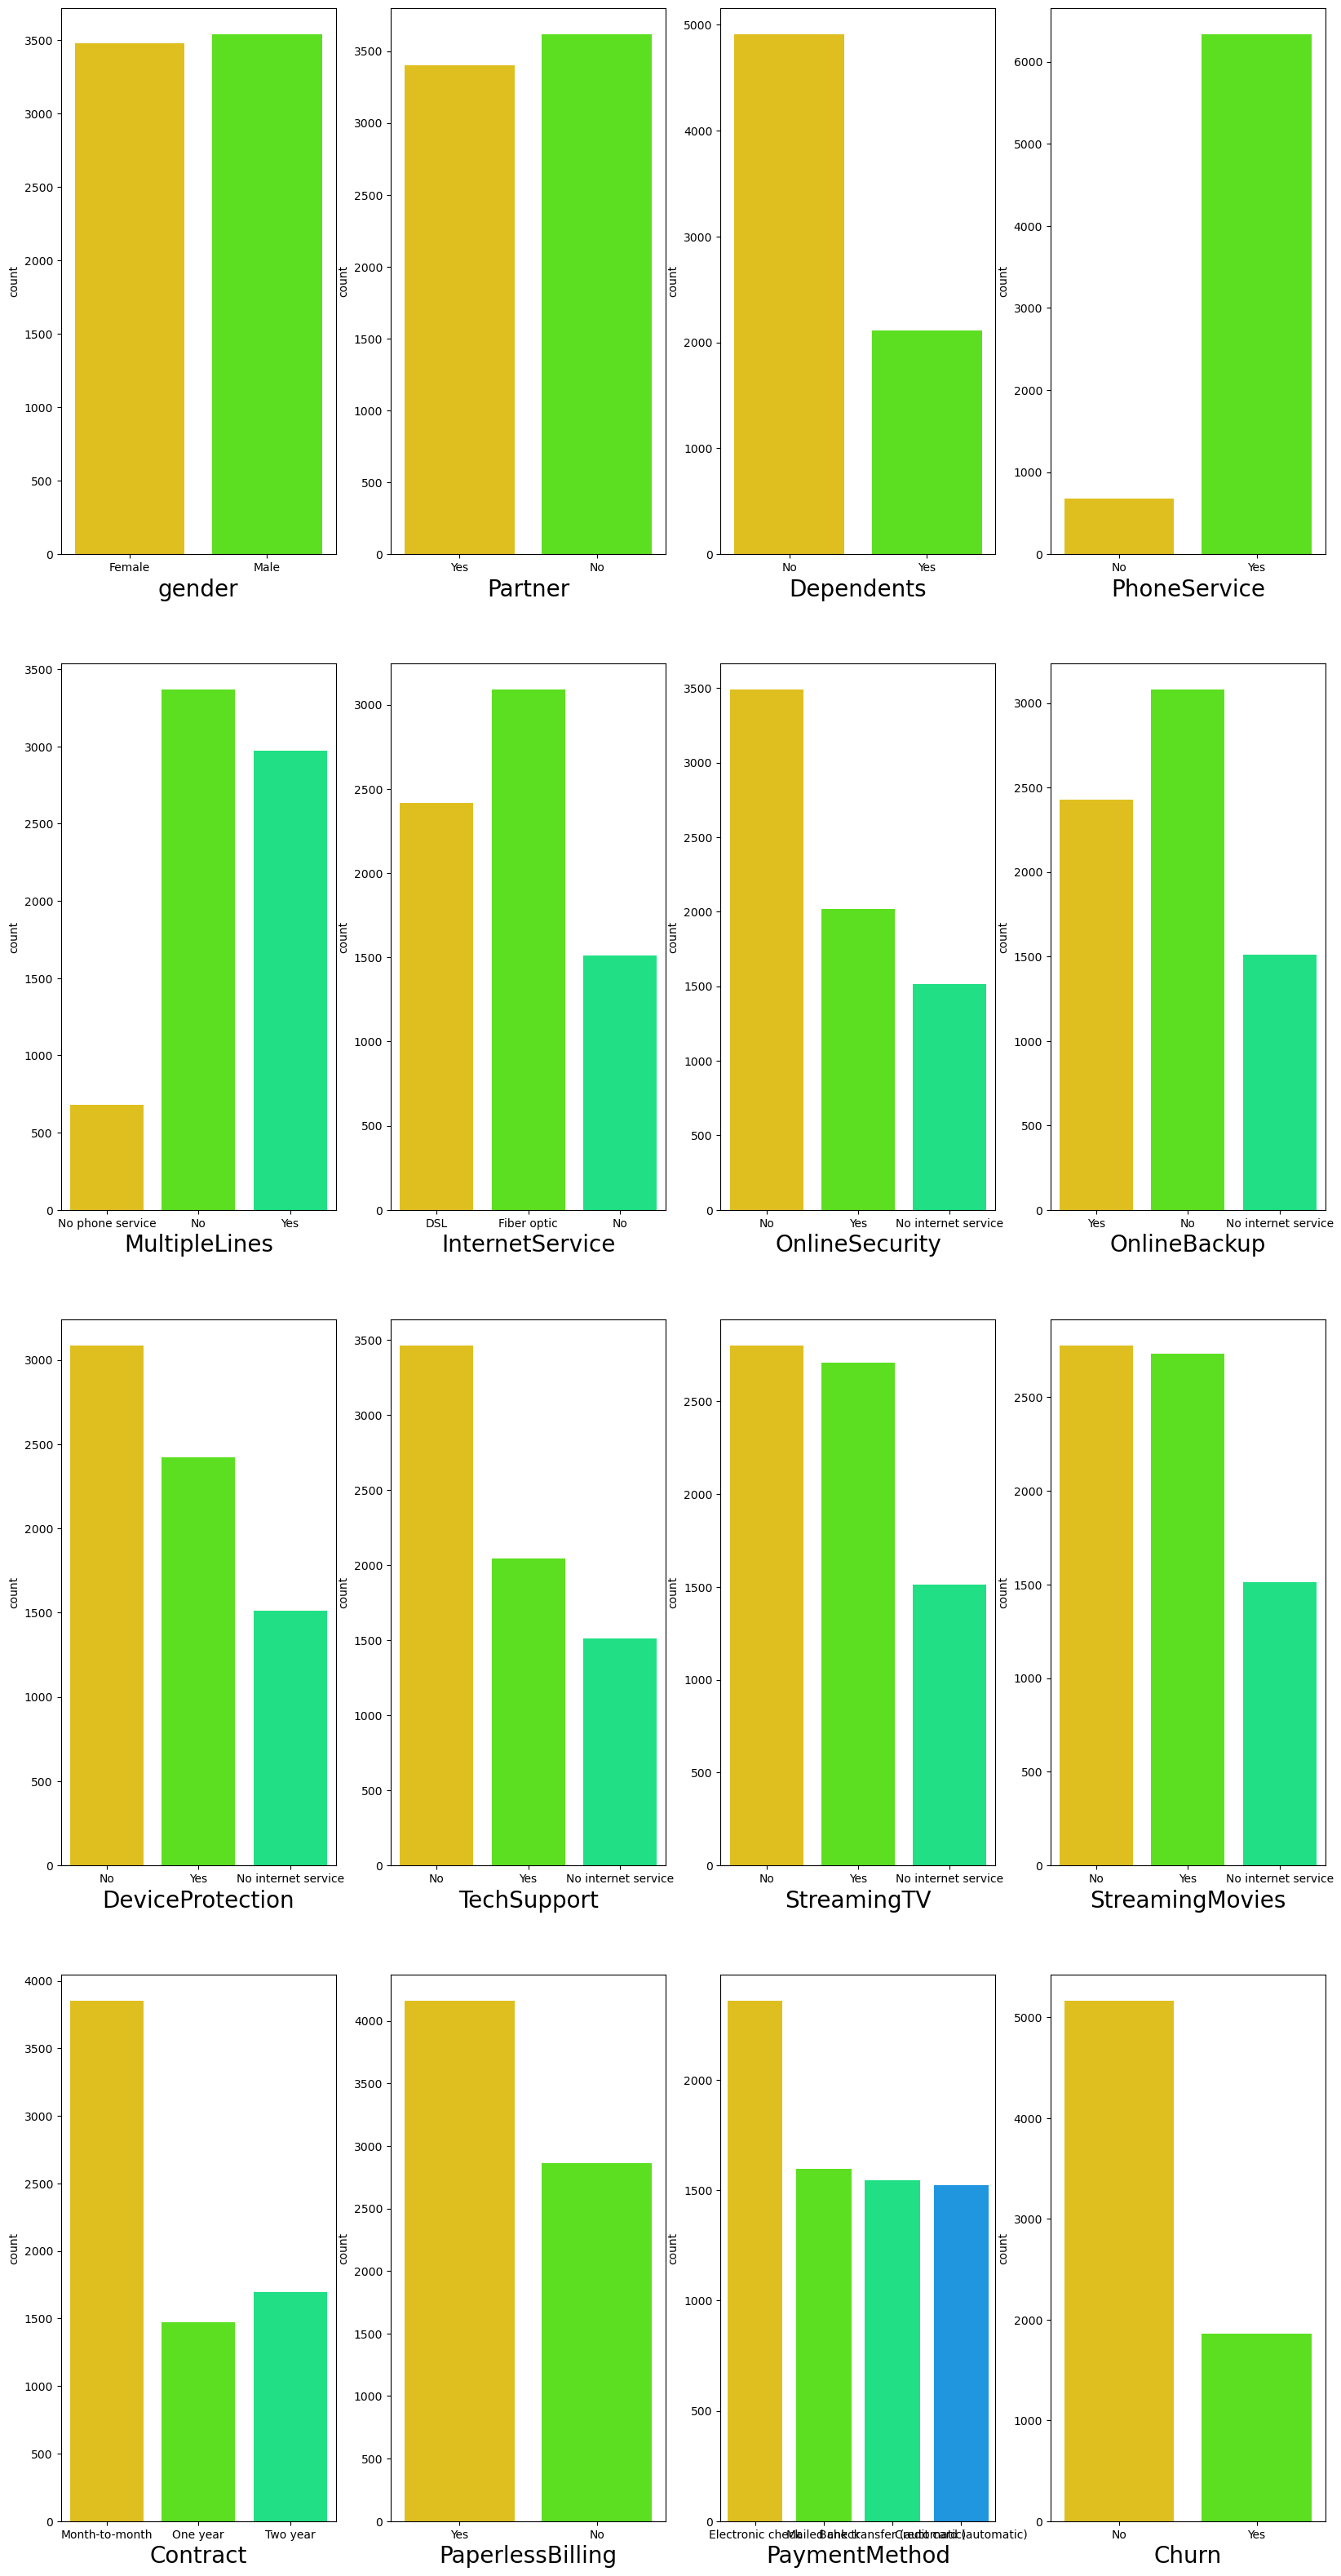

In [80]:
sns.set_palette('hsv')
plt.figure(figsize=(20,40),facecolor='white')
plotnumber=1
for i in categorical:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.countplot(x=df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [83]:
df['Churn'].value_counts()

Churn
No     5164
Yes    1857
Name: count, dtype: int64

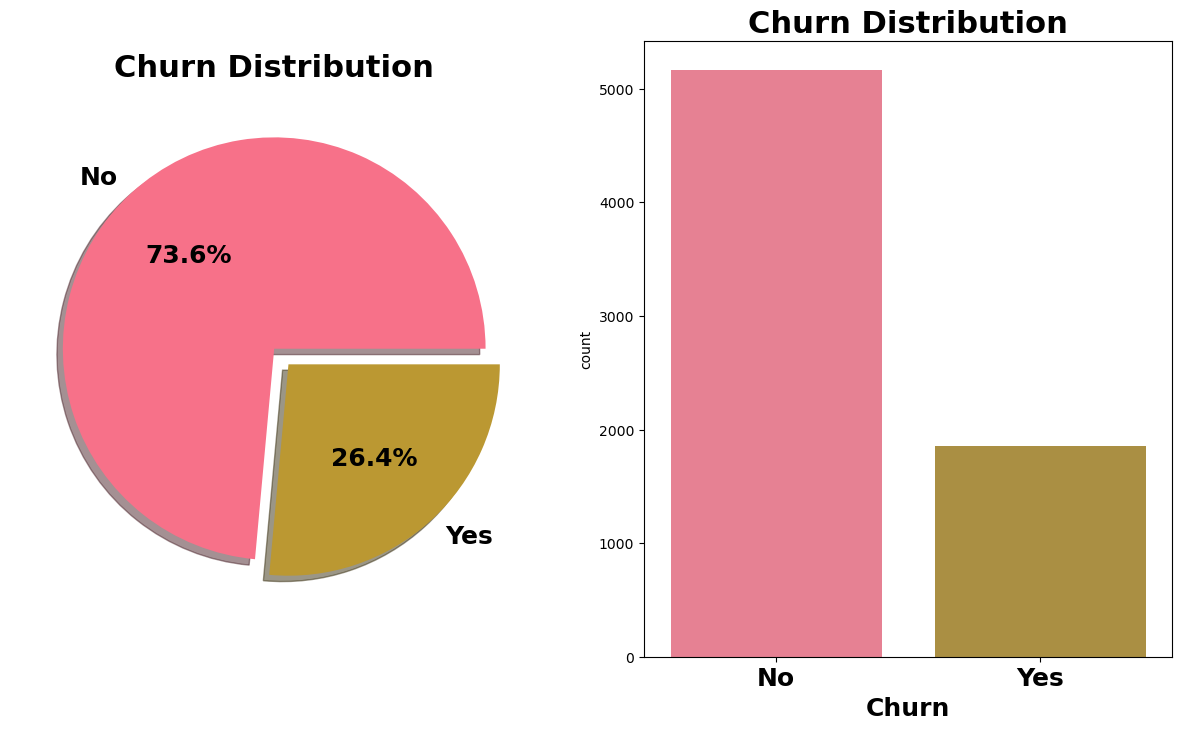

In [87]:
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct="%3.1f%%",
                                   textprops={'fontweight':"bold",'fontsize':18},ax=ax[0],shadow=True)
ax[0].set_title('Churn Distribution',fontsize=22,fontweight="bold")
ax[0].set_ylabel('')
sns.countplot(x='Churn',data=df,ax=ax[1])
ax[1].set_title("Churn Distribution",fontsize=22,fontweight="bold")
ax[1].set_xlabel("Churn",fontsize=18,fontweight="bold")
plt.xticks(fontsize=18,fontweight="bold")
plt.show()

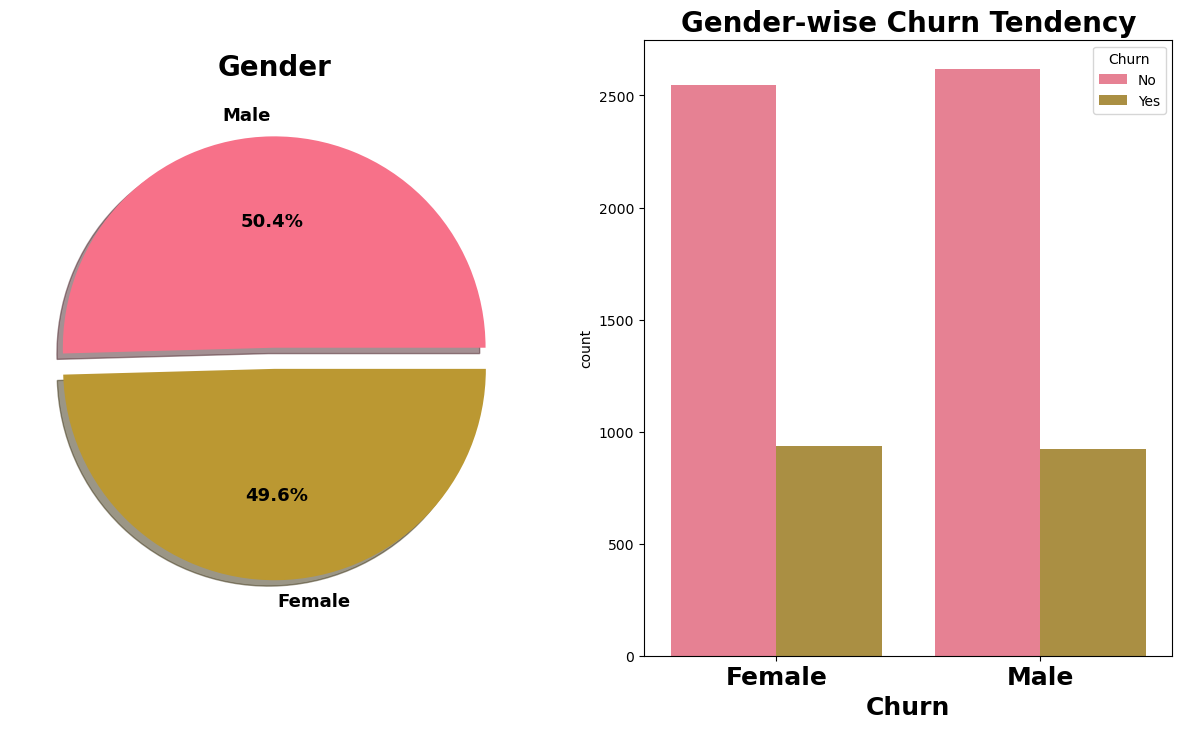

In [88]:
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(15,8))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct="%2.1f%%",
                                   textprops={'fontweight':"bold",'fontsize':13},ax=ax[0],shadow=True)
ax[0].set_title('Gender',fontsize=20,fontweight="bold")
ax[0].set_ylabel('')
sns.countplot(x='gender',hue="Churn",data=df,ax=ax[1])
ax[1].set_title("Gender-wise Churn Tendency",fontsize=20,fontweight="bold")
ax[1].set_xlabel("Churn",fontsize=18,fontweight="bold")
plt.xticks(fontsize=18,fontweight="bold")
plt.show()

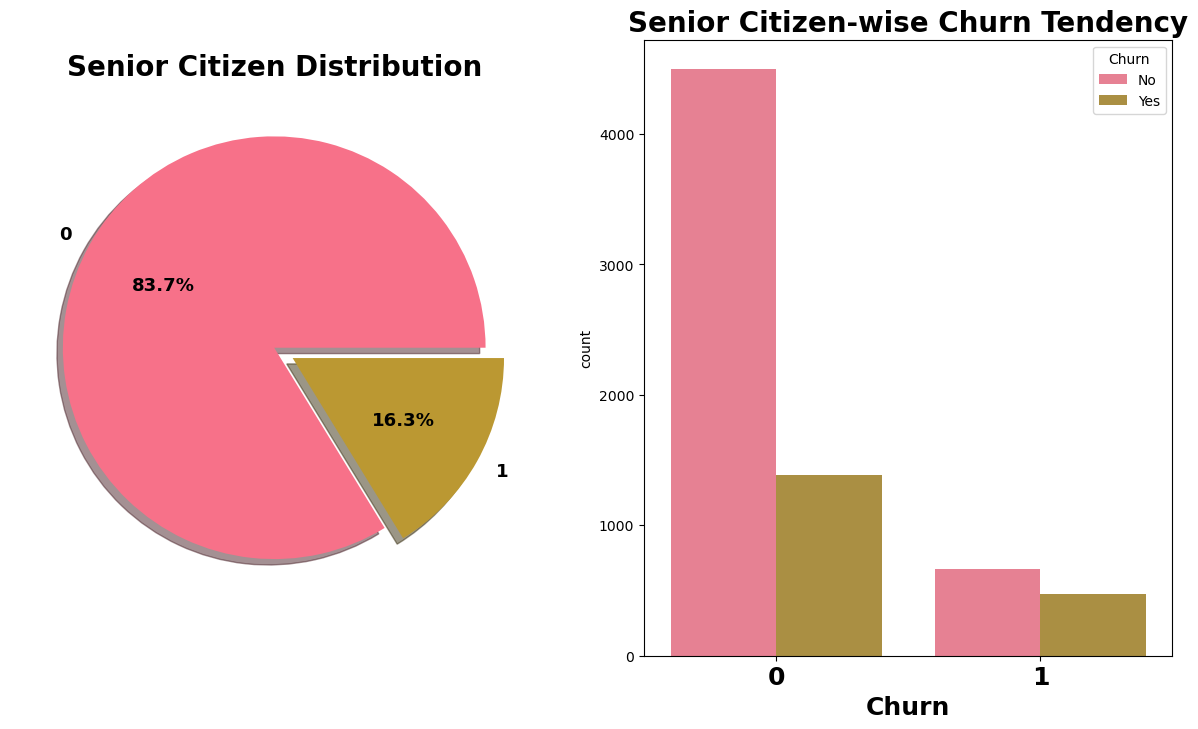

In [89]:
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(15,8))
df['SeniorCitizen'].value_counts().plot.pie(explode=[0,0.1],autopct="%2.1f%%",
                                   textprops={'fontweight':"bold",'fontsize':13},ax=ax[0],shadow=True)
ax[0].set_title('Senior Citizen Distribution',fontsize=20,fontweight="bold")
ax[0].set_ylabel('')
sns.countplot(x='SeniorCitizen',hue="Churn",data=df,ax=ax[1])
ax[1].set_title("Senior Citizen-wise Churn Tendency",fontsize=20,fontweight="bold")
ax[1].set_xlabel("Churn",fontsize=18,fontweight="bold")
plt.xticks(fontsize=18,fontweight="bold")
plt.show()

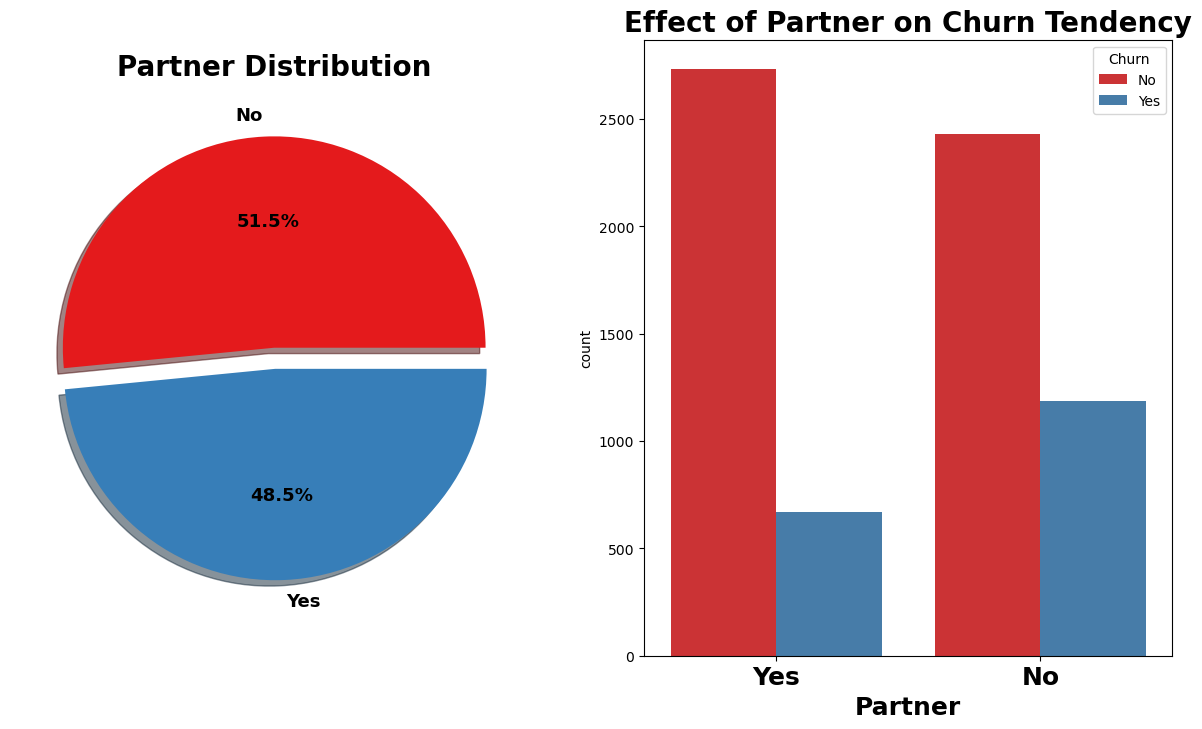

In [99]:
sns.set_palette('Set1')
fig,ax=plt.subplots(1,2,figsize=(15,8))
df['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct="%2.1f%%",
                                   textprops={'fontweight':"bold",'fontsize':13},ax=ax[0],shadow=True)
ax[0].set_title('Partner Distribution',fontsize=20,fontweight="bold")
ax[0].set_ylabel('')
sns.countplot(x='Partner',hue="Churn",data=df,ax=ax[1])
ax[1].set_title("Effect of Partner on Churn Tendency",fontsize=20,fontweight="bold")
ax[1].set_xlabel("Partner",fontsize=18,fontweight="bold")
plt.xticks(fontsize=18,fontweight="bold")
plt.show()

In [105]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2802
Yes                    2707
No internet service    1512
Name: count, dtype: int64

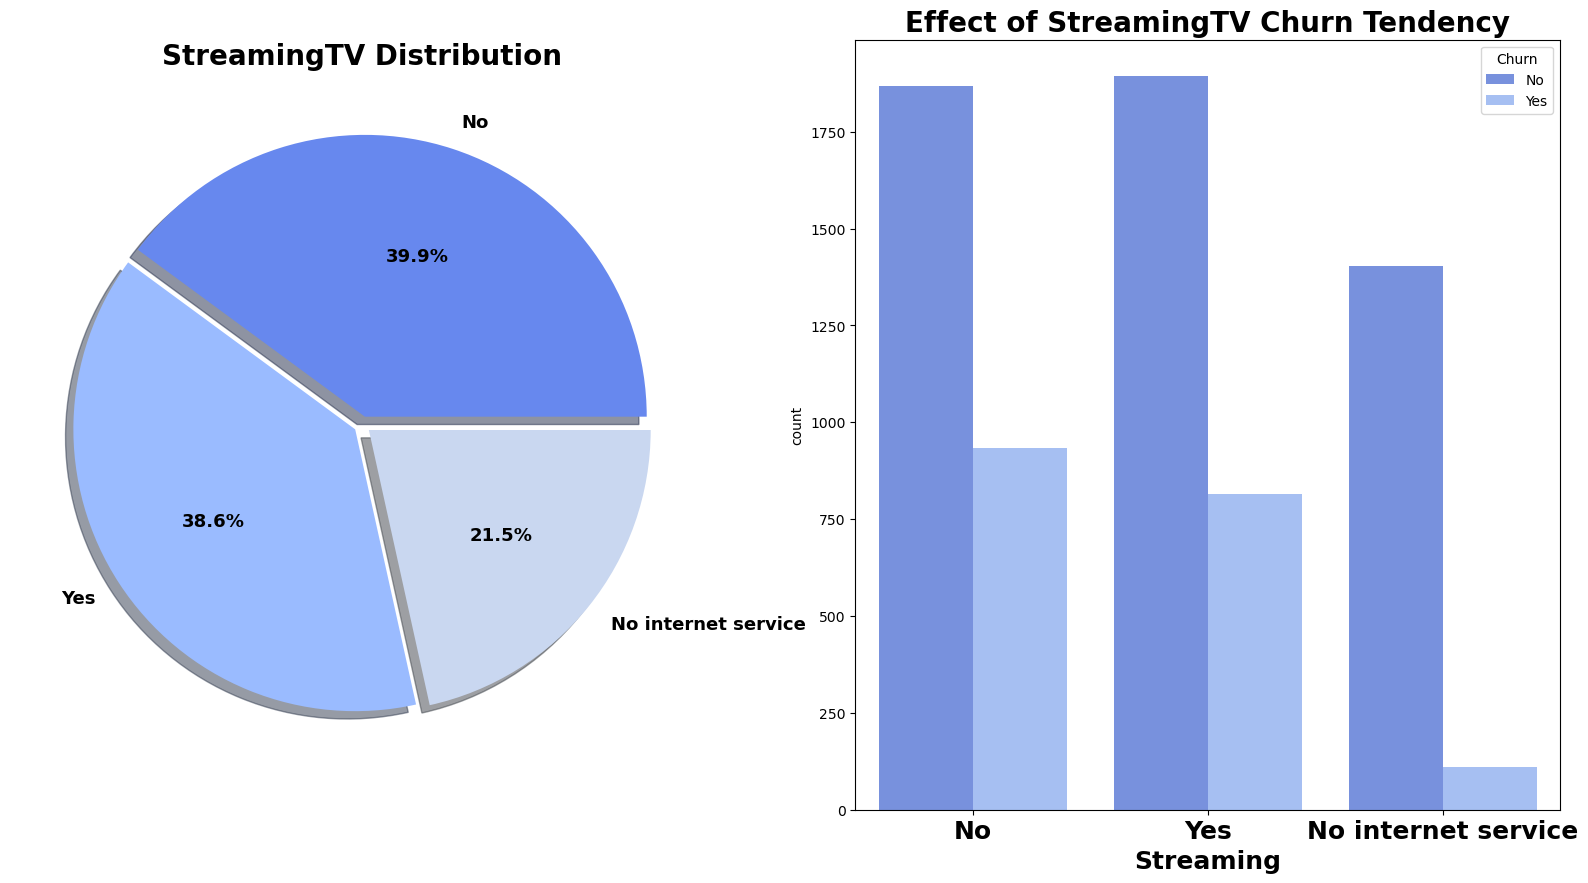

In [104]:
sns.set_palette('coolwarm')
fig,ax=plt.subplots(1,2,figsize=(20,10))
df['StreamingTV'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct="%2.1f%%",
                                   textprops={'fontweight':"bold",'fontsize':13},ax=ax[0],shadow=True)
ax[0].set_title('StreamingTV Distribution',fontsize=20,fontweight="bold")
ax[0].set_ylabel('')
sns.countplot(x='StreamingTV',hue="Churn",data=df,ax=ax[1])
ax[1].set_title("Effect of StreamingTV Churn Tendency",fontsize=20,fontweight="bold")
ax[1].set_xlabel("Streaming",fontsize=18,fontweight="bold")
plt.xticks(fontsize=18,fontweight="bold")
plt.show()

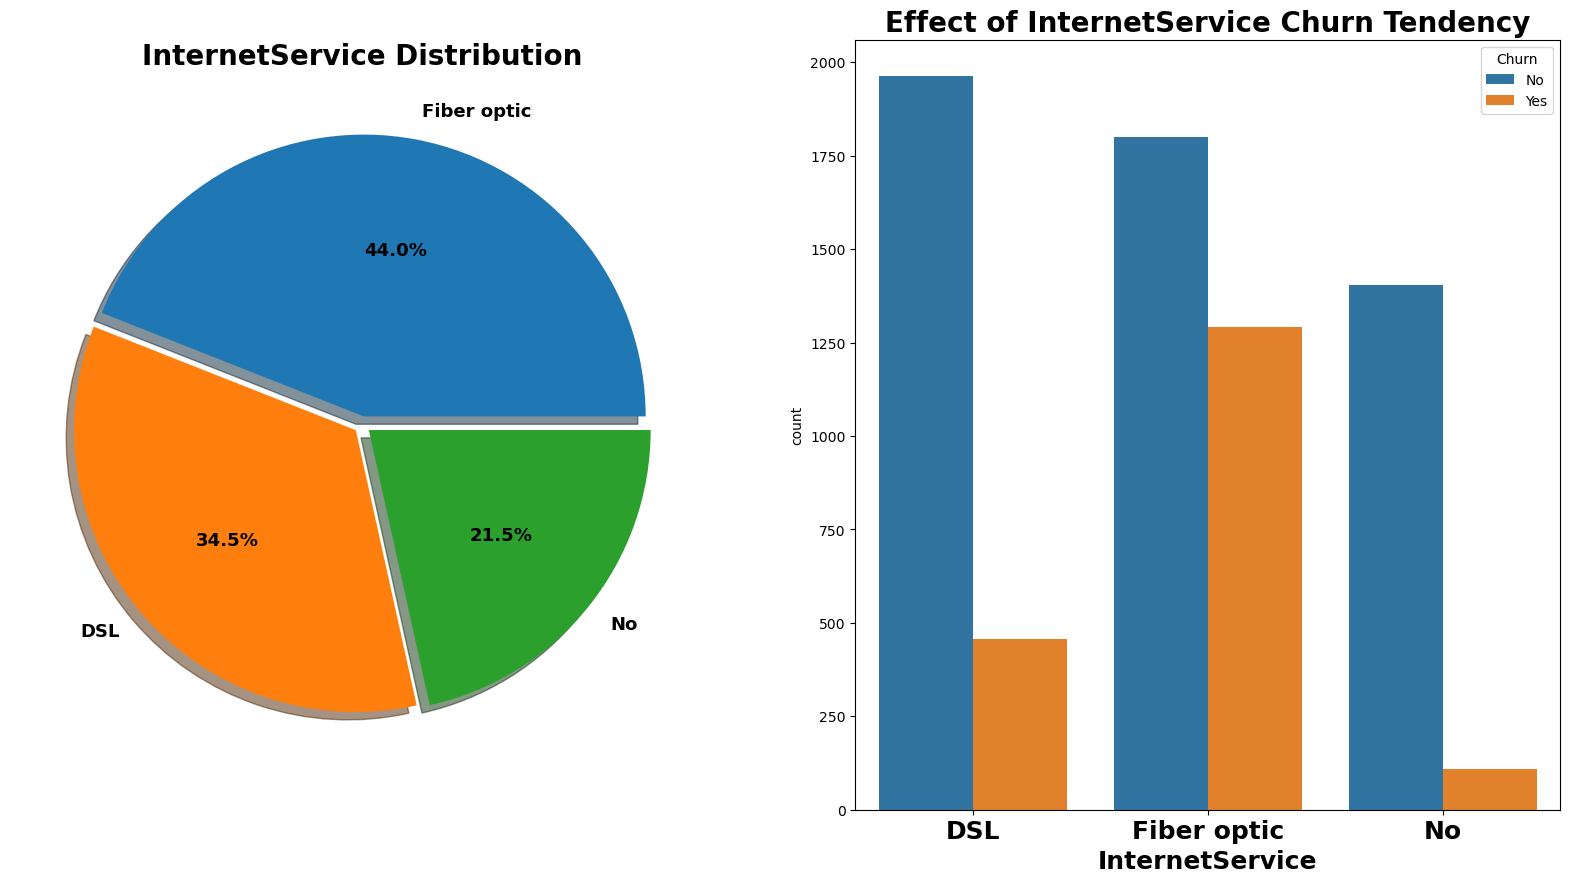

In [107]:
sns.set_palette('tab10')
fig,ax=plt.subplots(1,2,figsize=(20,10))
df['InternetService'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct="%2.1f%%",
                                   textprops={'fontweight':"bold",'fontsize':13},ax=ax[0],shadow=True)
ax[0].set_title('InternetService Distribution',fontsize=20,fontweight="bold")
ax[0].set_ylabel('')
sns.countplot(x='InternetService',hue="Churn",data=df,ax=ax[1])
ax[1].set_title("Effect of InternetService Churn Tendency",fontsize=20,fontweight="bold")
ax[1].set_xlabel("InternetService",fontsize=18,fontweight="bold")
plt.xticks(fontsize=18,fontweight="bold")
plt.show()

In [108]:
Numerical

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


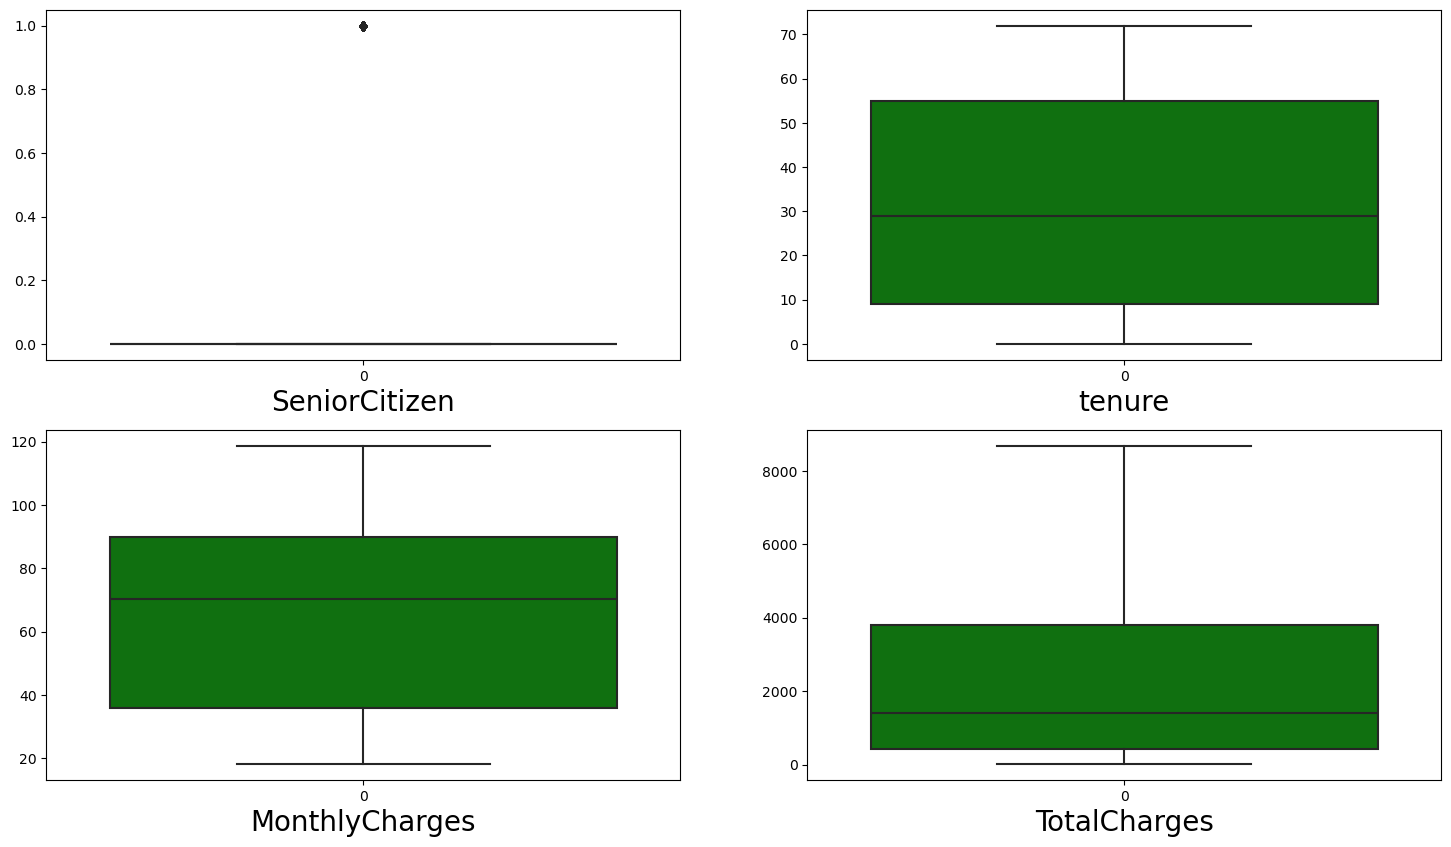

In [109]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1

plt.show()